# Twitter Sentiment Analysis

### Dependencies

In [0]:
# !pip install pandas
# !pip install tweepy
# !pip install vaderSentiment

In [0]:
import nltk
import tweepy
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

%matplotlib inline
nltk.download('vader_lexicon')
warnings.filterwarnings("ignore")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

### Parameters
* Twitter authentication variables can be created here: http://apps.twitter.com

In [0]:
# Twitter API Authentication Variables
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

twitter_search_phrase = 'Donald Trump'
number_of_tweets = 50000

### Twitter authentication

In [0]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

### Fetch data and create dataset

In [0]:
tweets = api.search(twitter_search_phrase, count=number_of_tweets)
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

In [0]:
display(data.head(10))
print(tweets[0].created_at)

,Tweets
0,RT @Kozmocostello: @AlexMLeo @PrisonPlanet Don...
1,RT @funder: Investigating Don Jr. Part 1: A fe...
2,"RT @AlbertoRodNews: Marco Rubio: ""La enorme ma..."
3,RT @Tennesseine: Do you think Donald Trump has...
4,RT @adamcbest: If you are a conservative conde...
5,"Donald Trump is ""Drunk Uncle"" sans the drinkin..."
6,RT @joncoopertweets: Donald Trump claimed on T...
7,@GovernorVA @jaketapper It was a long time ago...
8,RT @thebradfordfile: It’s worth noting the onl...
9,RT @JuddLegum: 1. Donald Trump's reelection ca...


2019-02-02 02:15:09


### Apply sentiment analysis and process dataset

In [0]:
sid = SentimentIntensityAnalyzer()

listy = []

for index, row in data.iterrows():
  ss = sid.polarity_scores(row["Tweets"])
  listy.append(ss)
  
se = pd.Series(listy)

In [0]:
data['polarity'] = se.values
data['negative'] = data['polarity'].apply(lambda x: x['neg'])
data['neutral'] = data['polarity'].apply(lambda x: x['neu'])
data['positive'] = data['polarity'].apply(lambda x: x['pos'])
data['compound'] = data['polarity'].apply(lambda x: x['compound'])
data.drop('polarity', axis=1, inplace=True)

In [21]:
display(data.head(10))

,Tweets,negative,neutral,positive,compound
0,RT @Kozmocostello: @AlexMLeo @PrisonPlanet Don...,0.000,0.829,0.171,0.5423
1,RT @funder: Investigating Don Jr. Part 1: A fe...,0.000,1.000,0.000,0.0000
2,"RT @AlbertoRodNews: Marco Rubio: ""La enorme ma...",0.000,1.000,0.000,0.0000
3,RT @Tennesseine: Do you think Donald Trump has...,0.000,1.000,0.000,0.0000
4,RT @adamcbest: If you are a conservative conde...,0.000,0.884,0.116,0.3612
5,"Donald Trump is ""Drunk Uncle"" sans the drinkin...",0.337,0.663,0.000,-0.6808
6,RT @joncoopertweets: Donald Trump claimed on T...,0.000,0.786,0.214,0.5994
7,@GovernorVA @jaketapper It was a long time ago...,0.000,1.000,0.000,0.0000
8,RT @thebradfordfile: It’s worth noting the onl...,0.066,0.742,0.191,0.4939
9,RT @JuddLegum: 1. Donald Trump's reelection ca...,0.105,0.895,0.000,-0.3804


### Overall sentiment

In [0]:
agg_sentiment = data.agg({'negative' : ['min', 'mean', 'max', 'sum'], 'neutral' : ['min', 'mean', 'max', 'sum'], 'positive' : ['min', 'mean', 'max', 'sum'], 'compound' : ['min', 'mean', 'max', 'sum']})
display(agg_sentiment)

,negative,neutral,positive,compound
min,0.00000,0.33900,0.00000,-0.877900
mean,0.06564,0.85514,0.07918,0.023687
max,0.36400,1.00000,0.37000,0.874800
sum,6.56400,85.51400,7.91800,2.368700


### Lowest sentiment value by type

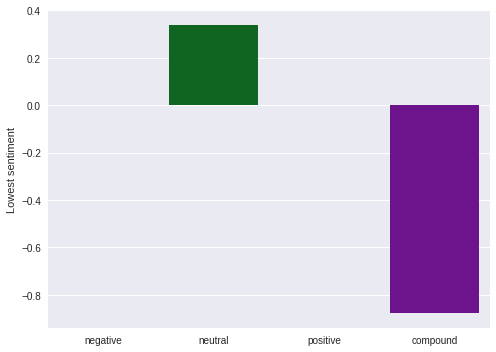

In [15]:
def sentiment_agg(labels, values, legend):
  f, ax = plt.subplots(figsize=(7, 5))
  sns.barplot(x=labels, y=values, palette="dark")
  ax.set_ylabel(legend)
  plt.tight_layout(h_pad=2)
  plt.show()

sentiment_agg(list(agg_sentiment.columns), agg_sentiment.loc['min'].values, "Lowest sentiment")

### Mean sentiment value by type

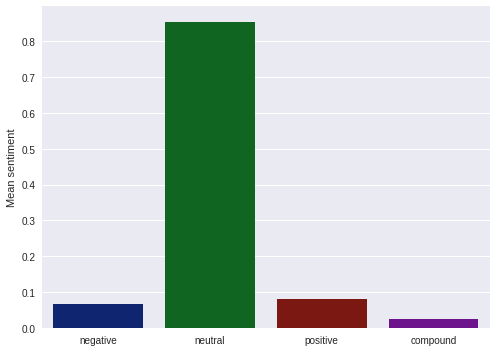

In [16]:
sentiment_agg(list(agg_sentiment.columns), agg_sentiment.loc['mean'].values, "Mean sentiment")

### Maximum sentiment value by type

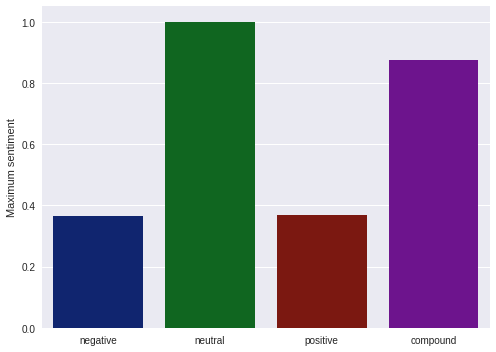

In [17]:
sentiment_agg(list(agg_sentiment.columns), agg_sentiment.loc['max'].values, "Maximum sentiment")

### Overall sentiment value by type

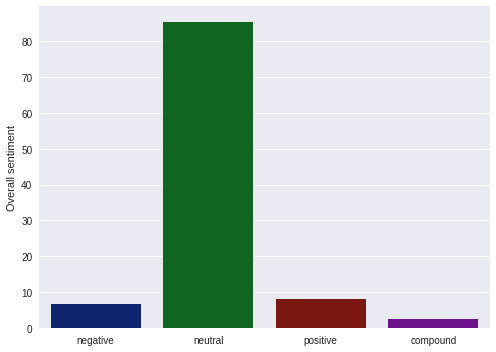

In [18]:
sentiment_agg(list(agg_sentiment.columns), agg_sentiment.loc['sum'].values, "Overall sentiment")